In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold
from keras.utils.np_utils import to_categorical
from sklearn.multiclass import OneVsRestClassifier as ovrc
from sklearn.ensemble import RandomForestClassifier
import time

/Users/harry.durbin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
# class train_model

In [128]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')
print dftrain.shape,  dftest.shape

(42000, 785) (28000, 784)


In [129]:
# for i in dftrain.columns:
#     print i

In [130]:
all_cols = dftrain.columns
feature_cols = all_cols[1:]
target_cols = all_cols[0]

In [175]:
X_train = dftrain[feature_cols]
y_train_0 = dftrain[[target_cols]]
X_test = dftest[feature_cols]

In [132]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y_train_0.values)
# LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False) 
lb.classes_
y_train = pd.DataFrame(lb.transform(y_train_0.values))

In [133]:
# cols_to_retain = [ 'label' ]
# cat_dict = y_train[ cols_to_retain ].to_dict( orient = 'records' )
# from sklearn.feature_extraction import DictVectorizer as DV
# vectorizer = DV( sparse = False )
# y_train_cat = vectorizer.fit_transform(  cat_dict )

In [151]:
X_train_28 = X_train.values.reshape((X_train.shape[0],28,28))
X_test_28 = X_test.values.reshape((X_test.shape[0],28,28))

In [10]:
# dftrain[dftrain.label==1]

In [11]:
X_train.values.shape

(42000, 784)

In [152]:
bottom = []
left = []
for i in range(X_train.shape[0]):
    for j in range(28):
        bottom.append(sum(X_train_28[i,j,:]))
        left.append(sum(X_train_28[i,:,j]))
bottom28 = np.reshape(bottom,((42000,28)))
left28 = np.reshape(left,((42000,28)))

bottom = []
left = []
for i in range(X_test.shape[0]):
    for j in range(28):
        bottom.append(sum(X_test_28[i,j,:]))
        left.append(sum(X_test_28[i,:,j]))
bottom28test = np.reshape(bottom,(X_test.values.shape[0],28))
left28test = np.reshape(left,(X_test.values.shape[0],28))

In [165]:
col_add1 = list(range(0,28))
col_add2 = list(range(28,56))

In [166]:
X_train_addon1 = pd.DataFrame(bottom28,columns = col_add1)
X_train_addon2 = pd.DataFrame(left28,columns = col_add2)

X_test_addon1 = pd.DataFrame(bottom28test,columns = col_add1)
X_test_addon2 = pd.DataFrame(left28test,columns = col_add2)

In [176]:
X_train = pd.concat([X_train,X_train_addon1,X_train_addon2],axis=1)
X_test = pd.concat([X_test,X_test_addon1,X_test_addon2],axis=1)

In [13]:
# y_train = pd.DataFrame(to_categorical(y_train0.values))

In [14]:
# def split_data_for_training(X_train, y_train):
n = y_train.shape[0]
kf = KFold(n, n_folds = 10, shuffle=True)   
for train_index, test_index in kf:
    Xtrain, ytrain = X_train.values[train_index], y_train.values[train_index]
    Xtest , ytest  = X_train.values[test_index], y_train.values[test_index]
        
#     return Xtrain, ytrain, Xtest, ytest

In [15]:
import sklearn.preprocessing as skpp

In [179]:
scaler = skpp.MinMaxScaler().fit(X_train.values)
# Xtrain = scaler.transform(Xtrain)
# Xtest = scaler.transform(Xtest)

In [180]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
X_test.shape

(28000, 840)

In [17]:
from sklearn.grid_search import GridSearchCV

/Users/harry.durbin/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [18]:
max_depth_0 = np.arange(1,50,5)
n_estimators_0 = np.arange(1,50,5)

In [19]:
param_grid_0=dict(max_depth = max_depth_0, n_estimators = n_estimators_0)

In [20]:
param_grid_0['max_features']=['auto', 'sqrt', 'log2']

In [21]:
param_grid_0

{'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])}

In [22]:
# grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_0,n_jobs=-1,cv=5)
# grid.fit(Xtrain, ytrain)
# print(grid)
# # summarize the results of the grid search
# print(grid.best_params_)

In [23]:
# ne = 20
# md = 12
# def random_forest(md,ne):
#     cv_best = 0
#     rf = ovrc(RandomForestClassifier(max_depth = md, n_estimators = ne,n_jobs=-1))
#     rf = rf.fit(Xtrain,ytrain)
#     y_pred_rf = rf.predict(Xtest)
#     score = (y_pred_rf)-(ytest.T)
#     cv = (score == 0).sum()*100 / len(ytest)
# #     if cv > cv_best:
# #         rf_best = rf
# #         md_best = md
# #         ne_best = ne
    
#     print 'for md=',md,'ne=',ne, 'score=', cv
#     return rf
#     print 'The best parameters are: md=',md_best, 'ne=', ne_best

In [24]:
# for ne in np.arange(1,50,10):
#     to = time.time()
#     rf =random_forest(md,ne)
#     tf = time.time()-to
#     print tf

In [25]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

In [208]:
X= 32

In [214]:
X=X*2
X

512

In [225]:
to = time.time()
model = Sequential()
model.add(Dense(4096, input_dim=784+56, init='uniform', activation='relu', W_constraint=maxnorm(2))) #'linear'
# model.add(Dense(128,  init='uniform', activation='linear', W_constraint=maxnorm(5))) 
# model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='sigmoid'))

optimizer_0 = optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train.values, nb_epoch=50, batch_size=1000, validation_split=0.1,verbose=1)

# loss_and_metrics = model.evaluate(Xtest, ytest, batch_size=50)

print time.time()-to
# print loss_and_metrics

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 86s - loss: 0.4884 - acc: 0.8571 - val_loss: 0.2169 - val_acc: 0.9350
Epoch 2/50
37800/37800 [==============================] - 51s - loss: 0.1723 - acc: 0.9501 - val_loss: 0.1574 - val_acc: 0.9533
Epoch 3/50
37800/37800 [==============================] - 74s - loss: 0.1140 - acc: 0.9687 - val_loss: 0.1259 - val_acc: 0.9602
Epoch 4/50
37800/37800 [==============================] - 72s - loss: 0.0849 - acc: 0.9760 - val_loss: 0.1060 - val_acc: 0.9676
Epoch 5/50
37800/37800 [==============================] - 61s - loss: 0.0614 - acc: 0.9842 - val_loss: 0.0946 - val_acc: 0.9714
Epoch 6/50
37800/37800 [==============================] - 76s - loss: 0.0498 - acc: 0.9875 - val_loss: 0.0908 - val_acc: 0.9712
Epoch 7/50
37800/37800 [==============================] - 72s - loss: 0.0367 - acc: 0.9909 - val_loss: 0.0860 - val_acc: 0.9726
Epoch 8/50
37800/37800 [==============================]

KeyboardInterrupt: 

In [188]:
y_pred = model.predict_classes(X_test, batch_size=10)
# prob_matrix = model.predict_proba(Xtest, batch_size=10)

27980/28000 [============================>.] - ETA: 0s

In [115]:
# y_train


In [52]:
classes_keras

array([0, 2, 5, ..., 9, 9, 2])

In [123]:
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [54]:
X_test.values.shape

(28000, 784)

In [65]:
Xtest.shape

(4200, 784)

In [102]:
y_pred = model.predict_classes(X_test, batch_size=50)

28000/28000 [==============================] - 3s     


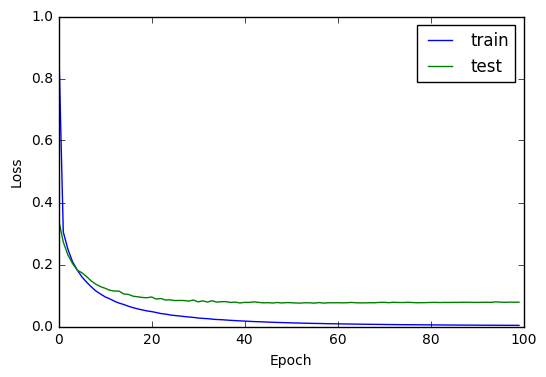

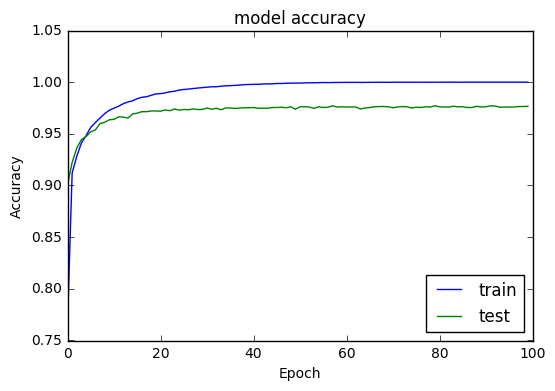

In [220]:
import matplotlib.pyplot as plt

plt.figure(1)
y1 = hist.history['loss'][:]
y2 = hist.history['val_loss'][:]
plt.plot(y1)
plt.plot(y2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

plt.plot(hist.history['acc'][:])
plt.plot(hist.history['val_acc'][:])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


In [45]:

# def neural_network(neurons = 1):

#     model = Sequential()
#     model.add(Dense(neurons, input_dim=784, init='uniform', activation='relu')) #, W_constraint=maxnorm(4))) 'linear'
#     model.add(Dropout(0.2))
#     model.add(Dense(10, init='uniform', activation='sigmoid'))
    
#     optimizer_0 = optimizers.SGD(lr=.001, momentum=0.9)
#     model.compile(loss='categorical_crossentropy',optimizer=optimizer_0, metrics=['accuracy'])
    
#     return model

# # fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)

# # create model
# model = KerasClassifier(build_fn=neural_network, nb_epoch=100, batch_size=10, verbose=0)
# # define the grid search parameters
# neurons = [1, 5, 10, 15] #, 20, 25, 30]
# param_grid = dict(neurons=neurons)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
# grid_result = grid.fit(Xtrain, ytrain)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
# plt.figure(1)
# y = hist.history['loss'][:]
# y = hist.history['val_loss'][:]
# plt.plot(y)
# plt.plot(y)
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['train','test'],loc='upper right')
# plt.show()

# plt.plot(hist.history['acc'][:])
# plt.plot(hist.history['val_acc'][:])
# plt.title('model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.show()

In [ ]:
# to = time.time()
# random_forest_classifier(Xtrain,ytrain)
# tf = time.time() - to
# print tf

In [ ]:
def from_categorical(y_pred_rf1)
    y_pred_rf = []
    for i in range(shape(y_pred_rf1)[0]):
        y_pred_rf.append(np.argmax(y_pred_rf1[i]))
    return y_pred_rf

In [ ]:
cv_rf = 0
cv_cnn = 0
ctr = 0

for i in ytest:
    if np.argmax(y_pred_rf[ctr]) == (i):
        cv_rf += 1
    if (y_pred_cnn[ctr]) == (i):
        cv_cnn += 1
    ctr += 1

print 'Random Forest CV = ', cv_rf*100/ctr ,'%'
print 'Neural Network CV =' , cv_cnn*100/ctr ,'%'


In [40]:
index

RangeIndex(start=0, stop=28000, step=1)

In [44]:
y_pred.shape

(28000,)

In [75]:
index[1]

1

In [80]:
len(X_test)

28000

In [221]:
# index = X_test.index, 
submission = pd.DataFrame({'ImageID':list(range(1,len(y_pred)+1)),"label":y_pred})
# submission['ImageId'] = np.arange(0,len(X_test))
submission.to_csv('submission_hjd.csv',index=False, header=True)

In [ ]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');